### Imports and Preferences

In [192]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations
from collections import Counter

In [2]:
pd.set_option("display.max_rows", 1000)

### Concatenating splintered dataset into a single dataframe

In [3]:
files = [file for file in os.listdir("../source_files")]

df = pd.DataFrame()

for file in files:

    temp_df = pd.read_csv("../source_files/" + file)

    df = pd.concat([df, temp_df])


### Data Cleaning

In [4]:
# Removing the redundant headers & empty rows.

df = df[df["Order ID"].apply(lambda x : str(x).isnumeric())]

In [5]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Data Augmentation

In [6]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [7]:
# Converting the relevant columns to the right data type.

df["Order ID"] = pd.to_numeric(df["Order ID"])

df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])

df["Price Each"] = pd.to_numeric(df["Price Each"])

df["Order Date"] = pd.to_datetime(df["Order Date"])



In [8]:
df.dtypes

Order ID                     int64
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [9]:
# Extracting and adding a 'Month' column.

df["Month"] = df["Order Date"].apply(lambda x : x.month)

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


In [ ]:
# Extracting and adding an 'Hour' column.

df["Hour"] = df["Order Date"].dt.hour

df.head()

In [10]:
# Adding a 'Total Price' column, where Total Price = Quantity Ordered * Price Each.

df["Total Price"] = df["Quantity Ordered"] * df["Price Each"]

df.head()

In [74]:
# Extracting and adding a city column.

def extract_city(address):

    return address.split(",")[1].strip() + " " + address.split(",")[2].split(" ")[1].strip()


df["City"] = df["Purchase Address"].apply(lambda x : extract_city(x))


df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


### Questions

##### What was the best month for sales? How much was earned that month?

In [25]:
# Total sales per month.

total_sales_per_month = df.groupby("Month")["Total Price"].sum()

total_sales_per_month

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Total Price, dtype: float64

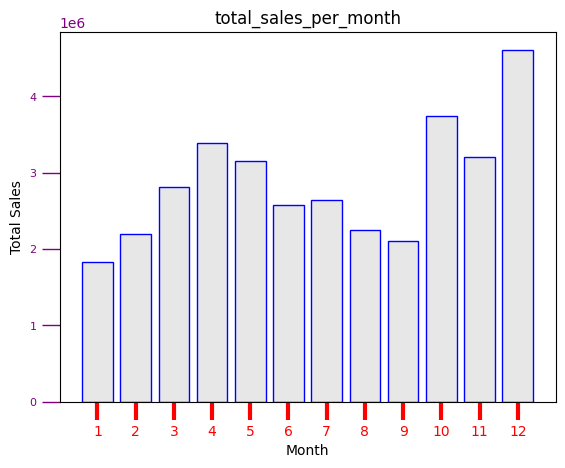

In [112]:
# Basic bar chart for total_sales_per_month.

months = np.array(total_sales_per_month.index)

total_sales = np.array(total_sales_per_month.values)

plt.bar(months, total_sales, color = (0.1, 0.1, 0.1, 0.1), edgecolor="blue")

plt.xticks(months)
plt.tick_params(axis='x', colors='red', direction='out', length=13, width=3)
plt.xlabel("Month")

plt.ylabel("Total Sales")
plt.yticks(size=8)
plt.tick_params(axis='y', colors='purple', direction='out', length=13, width=1)

plt.title("total_sales_per_month")

plt.show()

In [30]:
# Best month for sales & How much was earned.

print("Best month for sales : ", total_sales_per_month.idxmax())

print("How much was earned : ", total_sales_per_month.max())

Best month for sales :  12
How much was earned :  4613443.34


##### What city had the highest number of sales

In [75]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [77]:
# Total sales per city.

total_sales_per_city = df.groupby("City")["Total Price"].sum()

total_sales_per_city

City
Atlanta GA          2795498.58
Austin TX           1819581.75
Boston MA           3661642.01
Dallas TX           2767975.40
Los Angeles CA      5452570.80
New York City NY    4664317.43
Portland ME          449758.27
Portland OR         1870732.34
San Francisco CA    8262203.91
Seattle WA          2747755.48
Name: Total Price, dtype: float64

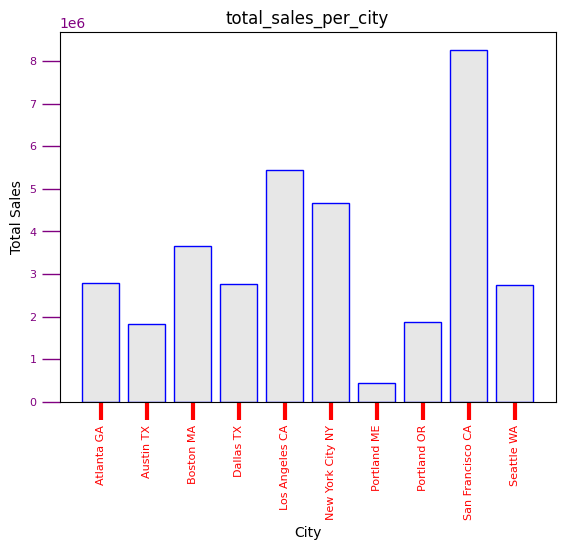

In [113]:
# Basic bar chart for total_sales_per_city.

cities = np.array(total_sales_per_city.index)

total_sales = np.array(total_sales_per_city.values)

plt.bar(cities, total_sales, color = (0.1, 0.1, 0.1, 0.1), edgecolor="blue")

plt.xticks(cities)
plt.tick_params(axis='x', colors='red', direction='out', length=13, width=3)
plt.xticks(rotation=90, size=8)
plt.xlabel("City")

plt.ylabel("Total Sales")
plt.yticks(size=8)
plt.tick_params(axis='y', colors='purple', direction='out', length=13, width=1)

plt.title("total_sales_per_city")

plt.show()

In [93]:
# Best selling city and how much was sold.

print("Best selling city : ", total_sales_per_city.idxmax())

print("How much was sold : ", total_sales_per_city.max())

Best selling city :  San Francisco CA
How much was sold :  8262203.91


##### What is the best time to show advertisements?

In [94]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [125]:
# Total sales per hour & Number of unique orders per hour.

total_sales_per_hour = df.groupby("Hour")["Total Price"].sum()

number_of_unique_orders_per_hour = df.groupby("Hour")["Order ID"].unique().apply(lambda x : len(x))


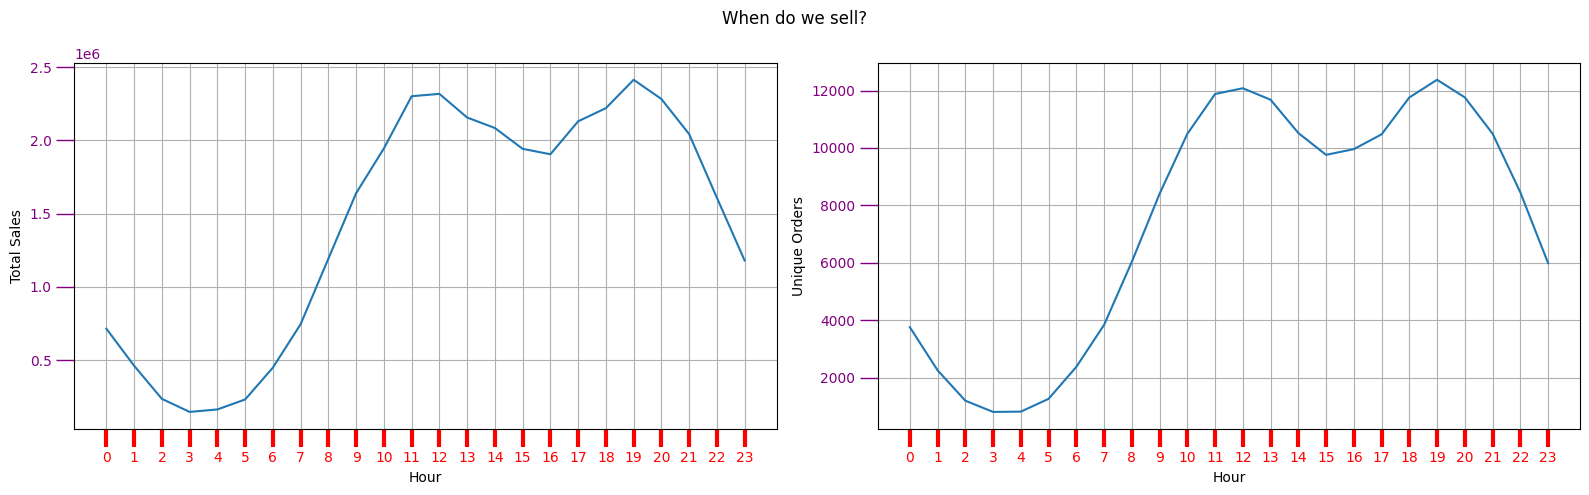

In [159]:
# Basic line chart for total_sales_per_hour and number_of_unique_orders_per_hour.

hours = np.array(total_sales_per_hour.index)

total_sales = np.array(total_sales_per_hour.values)

unique_orders = np.array(number_of_unique_orders_per_hour.values)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5), tight_layout=True)
fig.suptitle('When do we sell?')

ax1.plot(hours, total_sales)
ax2.plot(hours, unique_orders)

ax1.set_xlabel("Hour")
ax1.set_ylabel("Total Sales")
ax1.set_xticks(hours, size=8)
ax1.tick_params(axis='x', colors='red', direction='out', length=13, width=3)
ax1.tick_params(axis='y', colors='purple', direction='out', length=13, width=1)
ax1.grid()


ax2.set_xlabel("Hour")
ax2.set_ylabel("Unique Orders")
ax2.set_xticks(hours, size=8)
ax2.tick_params(axis='x', colors='red', direction='out', length=13, width=3)
ax2.tick_params(axis='y', colors='purple', direction='out', length=13, width=1)
ax2.grid()


plt.show()

##### What products are sold together most often?

In [160]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9


In [195]:
# Finding all orders which include more than a single product.

temp_df = df.groupby("Order ID")["Product"].apply(lambda x : ", ".join(x))

temp_df = temp_df[temp_df.apply(lambda x : len(x.split(", ")) > 1)]

temp_df = pd.DataFrame({"Order ID" : temp_df.index, "Products" : temp_df.values})

temp_df["Products"] = temp_df["Products"].apply(lambda x : x.split(", "))

temp_df


,Order ID,Products
0,141275,"[USB-C Charging Cable, Wired Headphones]"
1,141290,"[Apple Airpods Headphones, AA Batteries (4-pack)]"
2,141365,"[Vareebadd Phone, Wired Headphones]"
3,141384,"[Google Phone, USB-C Charging Cable]"
4,141450,"[Google Phone, Bose SoundSport Headphones]"
...,...,...
7131,319536,"[Macbook Pro Laptop, Wired Headphones]"
7132,319556,"[Google Phone, Wired Headphones]"
7133,319584,"[iPhone, Wired Headphones]"
7134,319596,"[iPhone, Lightning Charging Cable]"


In [207]:
# Counting how often the different product combinations occur in the dataset.

count_pairs = Counter()

count_triplets = Counter()

for row in temp_df["Products"] : 

    count_pairs.update(Counter(combinations(row, 2)))
    count_triplets.update(Counter(combinations(row, 3)))

print()
print("________________________________________OOO_________________________________________")
print()


print("TEN MOST COMMON PRODUCT PAIRS")

for key, value in count_pairs.most_common(10):

    print(key, value)

print()
print("________________________________________WOW_________________________________________")
print()


print("TEN MOST COMMON PRODUCT TRIPLETS")

for key, value in count_triplets.most_common(10):

    print(key, value)

print()
print("________________________________________OMG_________________________________________")
print()


________________________________________OOO_________________________________________

TEN MOST COMMON PRODUCT PAIRS
('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92

________________________________________WOW_________________________________________

TEN MOST COMMON PRODUCT TRIPLETS
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable

##### What product sold the most?

In [210]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9


In [230]:
# Quantity sold per product & Total made per product

quantity_sold_per_product = df.groupby("Product")["Quantity Ordered"].sum()

total_made_per_product = df.groupby("Product")["Total Price"].sum()


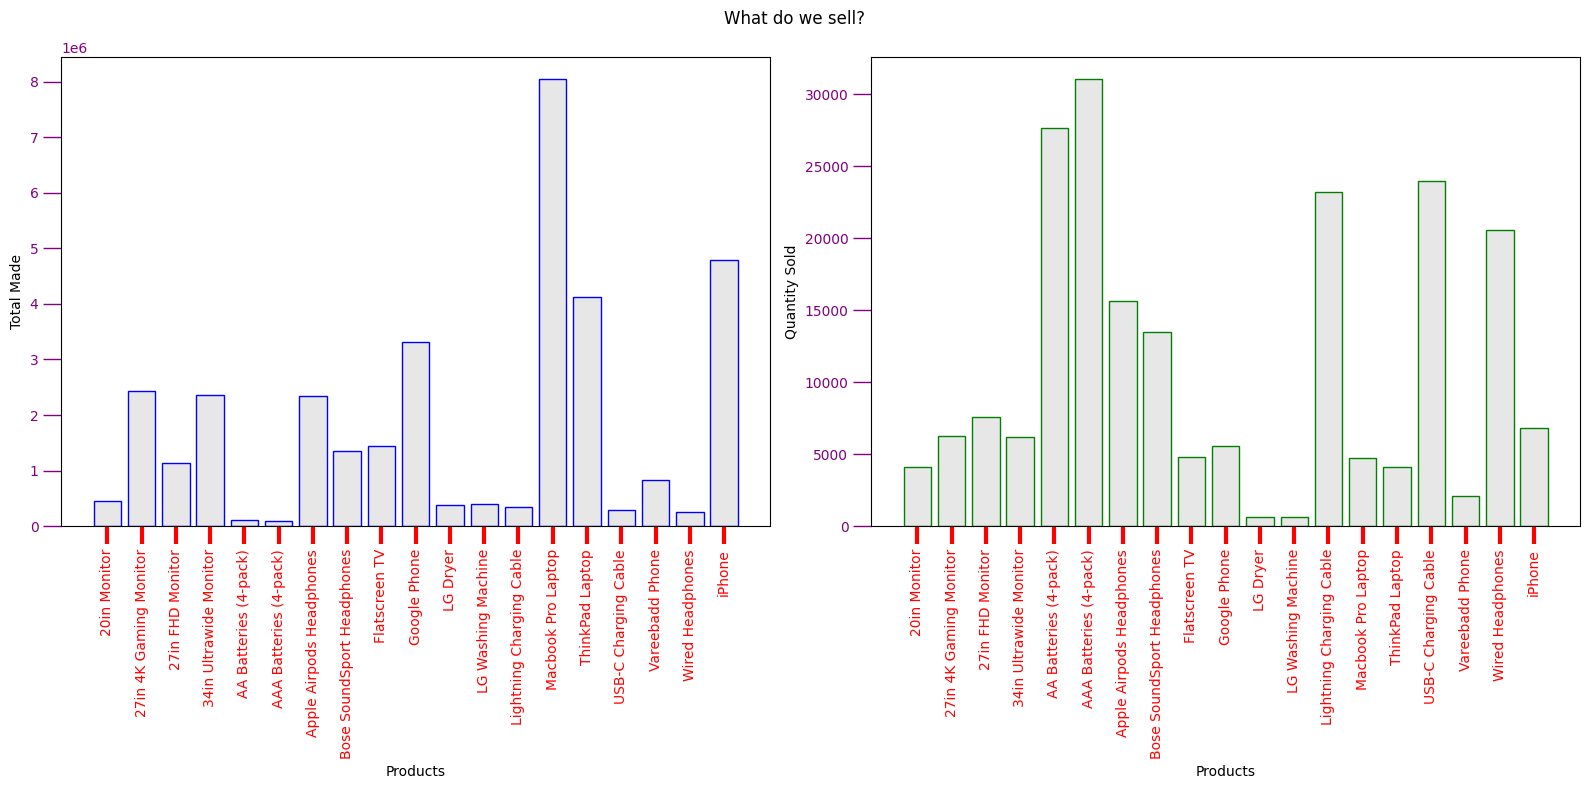

In [232]:
# Basic bar chart for quantity_sold_per_product & total_made_per_product.

products = np.array(quantity_sold_per_product.index)

quantity_sold = np.array(quantity_sold_per_product.values)

total_made = np.array(total_made_per_product.values)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), tight_layout=True)
fig.suptitle('What do we sell?')

ax1.bar(products, total_made, color = (0.1, 0.1, 0.1, 0.1), edgecolor="blue")
ax2.bar(products, quantity_sold, color = (0.1, 0.1, 0.1, 0.1), edgecolor="green")


ax1.set_xlabel("Products")
ax1.set_ylabel("Total Made")
ax1.set_xticks(products, size=8)
ax1.tick_params(axis='x', colors='red', direction='out', length=13, width=3, rotation=90)
ax1.tick_params(axis='y', colors='purple', direction='out', length=13, width=1)


ax2.set_xlabel("Products")
ax2.set_ylabel("Quantity Sold")
ax2.set_xticks(products, size=8)
ax2.tick_params(axis='x', colors='red', direction='out', length=13, width=3, rotation=90)
ax2.tick_params(axis='y', colors='purple', direction='out', length=13, width=1)

plt.show()